In [1]:
%run GLOBALS.py

3.5.1 |Continuum Analytics, Inc.| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]


In [2]:
import matplotlib as mpl
mpl.use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

%matplotlib inline

In [4]:
import elviz_utils

In [5]:
elviz_utils.prepare_plot_dir("./plots/")

'./plots/'

In [6]:
from elviz_pca import import_elviz_data
tmp = import_elviz_data(main_dir = MAIN_DIR)
tmp.head()

loading ..//results/reduced_data--all_taxonomy_remains.csv


fraction of reads
Genus       ID                          
Abiotrophia 123_LOW14       3.638477e-07
            22_HOW5         2.447423e-06
            44_HOW7         1.349533e-06
            4_LOW4          1.266953e-05
            52_LOW8         2.539954e-06

In [7]:
tmpg = import_elviz_data(main_dir = MAIN_DIR, genus_only=False)
tmpg.head()

loading ..//results/reduced_data--all_taxonomy_remains.csv


fraction of reads
Kingdom Phylum        Class        Order        Family        Genus      ID                        
Archaea Crenarchaeota Thermoprotei Acidilobales Acidilobaceae Acidilobus 10_HOW4           0.000002
                                                                         19_HOW5           0.000091
                                                                         22_HOW5           0.000007
                                                                         25_LOW6           0.000001
                                                                         28_LOW6           0.000002

In [8]:
from elviz_pca import pivot_for_pca
pivot_for_pca(dataframe=tmp).head()

ID,100_LOW12,103_HOW12,104_HOW12,105_HOW12,106_HOW12,109_LOW13,10_HOW4,110_LOW13,111_LOW13,112_LOW13,...,88_LOW11,8_HOW4,91_HOW11,92_HOW11,93_HOW11,94_HOW11,97_LOW12,98_LOW12,99_LOW12,9_HOW4
Genus,,,,,,,,,,,,,,,,,,,,,
Abiotrophia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000
Acaricomes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000
Acetivibrio,0.000012,0.000000,0.000002,0.000000,0.000000,0.000505,0.000000,0.000101,1.176477e-07,1.754130e-05,...,0.000010,0.000008,0.000001,0.000000,0.000002,0.000000,2.329513e-07,0.000757,0.0,0.000000
Acetobacter,0.000000,0.000002,0.000003,0.000001,0.000008,0.000000,0.000202,0.000185,1.835304e-06,5.814795e-07,...,0.000003,0.000025,0.000003,0.000016,0.000000,0.000008,9.318053e-07,0.000000,0.0,0.000066
Acetobacterium,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016,0.000000,1.882363e-07,2.907397e-07,...,0.000000,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000038


In [9]:
tmpg.head(2)

fraction of reads
Kingdom Phylum        Class        Order        Family        Genus      ID                        
Archaea Crenarchaeota Thermoprotei Acidilobales Acidilobaceae Acidilobus 10_HOW4           0.000002
                                                                         19_HOW5           0.000091

In [10]:
tmpg.unstack(6).head()

fraction of reads  \
ID                                                                                              100_LOW12   
Kingdom Phylum        Class        Order             Family             Genus                               
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus                    NaN   
                                                     Caldisphaeraceae   Caldisphaera                  NaN   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum                     NaN   
                                                                        Desulfurococcus               NaN   
                                                                        Ignisphaera                   NaN   

                                                                                                   \
ID                                                                                      103_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            NaN   
                                                     Caldisphaeraceae   Caldisphaera          NaN   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             NaN   
                                                                        Desulfurococcus       NaN   
                                                                        Ignisphaera           NaN   

                                                                                                   \
ID                                                                                      104_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            NaN   
                                                     Caldisphaeraceae   Caldisphaera          NaN   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             NaN   
                                                                        Desulfurococcus       NaN   
                                                                        Ignisphaera           NaN   

                                                                                                   \
ID                                                                                      105_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            NaN   
                                                     Caldisphaeraceae   Caldisphaera          NaN   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             NaN   
                                                                        Desulfurococcus       NaN   
                                                                        Ignisphaera           NaN   

                                                                                                   \
ID                                                                                      106_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            NaN   
                                                     Caldisphaeraceae   Caldisphaera          NaN   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             NaN   
                                                                        Desulfurococcus       NaN   
                                                                        Ignisphae

In [11]:
import_elviz_data(main_dir = MAIN_DIR, genus_only=False).unstack(6).head()

loading ..//results/reduced_data--all_taxonomy_remains.csv


fraction of reads  \
ID                                                                                              100_LOW12   
Kingdom Phylum        Class        Order             Family             Genus                               
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus                    NaN   
                                                     Caldisphaeraceae   Caldisphaera                  NaN   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum                     NaN   
                                                                        Desulfurococcus               NaN   
                                                                        Ignisphaera                   NaN   

                                                                                                   \
ID                                                                                      103_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            NaN   
                                                     Caldisphaeraceae   Caldisphaera          NaN   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             NaN   
                                                                        Desulfurococcus       NaN   
                                                                        Ignisphaera           NaN   

                                                                                                   \
ID                                                                                      104_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            NaN   
                                                     Caldisphaeraceae   Caldisphaera          NaN   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             NaN   
                                                                        Desulfurococcus       NaN   
                                                                        Ignisphaera           NaN   

                                                                                                   \
ID                                                                                      105_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            NaN   
                                                     Caldisphaeraceae   Caldisphaera          NaN   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             NaN   
                                                                        Desulfurococcus       NaN   
                                                                        Ignisphaera           NaN   

                                                                                                   \
ID                                                                                      106_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            NaN   
                                                     Caldisphaeraceae   Caldisphaera          NaN   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             NaN   
                                                                        Desulfurococcus       NaN   
                                                                        Ignisphae

In [12]:
pivot_for_pca(dataframe = import_elviz_data(main_dir = MAIN_DIR, genus_only=False), 
              genus_only=False).head()

loading ..//results/reduced_data--all_taxonomy_remains.csv


fraction of reads  \
ID                                                                                              100_LOW12   
Kingdom Phylum        Class        Order             Family             Genus                               
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus                    0.0   
                                                     Caldisphaeraceae   Caldisphaera                  0.0   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum                     0.0   
                                                                        Desulfurococcus               0.0   
                                                                        Ignisphaera                   0.0   

                                                                                                   \
ID                                                                                      103_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            0.0   
                                                     Caldisphaeraceae   Caldisphaera          0.0   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             0.0   
                                                                        Desulfurococcus       0.0   
                                                                        Ignisphaera           0.0   

                                                                                                   \
ID                                                                                      104_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            0.0   
                                                     Caldisphaeraceae   Caldisphaera          0.0   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             0.0   
                                                                        Desulfurococcus       0.0   
                                                                        Ignisphaera           0.0   

                                                                                                   \
ID                                                                                      105_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            0.0   
                                                     Caldisphaeraceae   Caldisphaera          0.0   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             0.0   
                                                                        Desulfurococcus       0.0   
                                                                        Ignisphaera           0.0   

                                                                                                   \
ID                                                                                      106_HOW12   
Kingdom Phylum        Class        Order             Family             Genus                       
Archaea Crenarchaeota Thermoprotei Acidilobales      Acidilobaceae      Acidilobus            0.0   
                                                     Caldisphaeraceae   Caldisphaera          0.0   
                                   Desulfurococcales Desulfurococcaceae Aeropyrum             0.0   
                                                                        Desulfurococcus       0.0   
                                                                        Ignisphae

In [13]:
from elviz_pca import sort_by_variance

In [14]:
df = sort_by_variance(main_dir=MAIN_DIR)

loading ..//results/reduced_data--all_taxonomy_remains.csv


In [15]:
df.head()

ID,100_LOW12,103_HOW12,104_HOW12,105_HOW12,106_HOW12,109_LOW13,10_HOW4,110_LOW13,111_LOW13,112_LOW13,...,8_HOW4,91_HOW11,92_HOW11,93_HOW11,94_HOW11,97_LOW12,98_LOW12,99_LOW12,9_HOW4,variance
Genus,,,,,,,,,,,,,,,,,,,,,
Methylobacter,0.488347,0.095143,0.108404,0.503628,0.623003,0.549671,0.108557,0.624100,0.591209,0.426575,...,0.084548,0.389379,0.233440,0.485999,0.434607,0.574470,0.599362,0.551515,0.140160,0.037289
Methylophilus,0.001117,0.214184,0.644610,0.301190,0.115445,0.001215,0.001388,0.004370,0.001814,0.001615,...,0.001438,0.016662,0.000607,0.071349,0.028545,0.015834,0.037089,0.022149,0.000780,0.020903
Methylosarcina,0.004356,0.001051,0.001257,0.000265,0.000425,0.008294,0.029223,0.008252,0.006342,0.003870,...,0.224498,0.003789,0.003180,0.001436,0.003096,0.003236,0.007644,0.005952,0.027935,0.009851
other,0.290945,0.285678,0.108489,0.134121,0.149535,0.285467,0.344256,0.275103,0.261152,0.293225,...,0.279652,0.281977,0.296174,0.254365,0.265055,0.308956,0.273024,0.276484,0.320078,0.007776
Methylotenera,0.095586,0.302930,0.019329,0.002308,0.011839,0.078632,0.267243,0.002985,0.024772,0.151965,...,0.196150,0.030921,0.180772,0.018022,0.028454,0.030945,0.003611,0.019807,0.253807,0.007023


In [16]:
'109_LOW13' in df.columns

True

In [17]:
from elviz_pca import plot_variance

In [18]:
print(MAIN_DIR)

../


loading ..//results/reduced_data--all_taxonomy_remains.csv


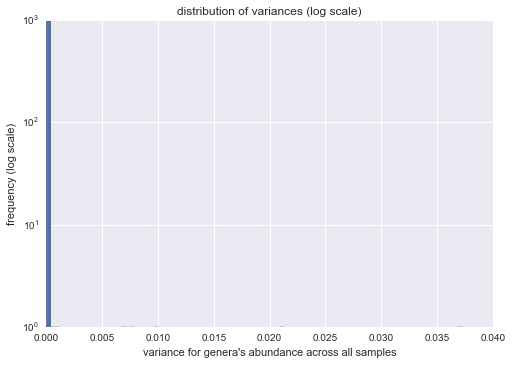

In [19]:
plot_variance(main_dir=MAIN_DIR)

In [20]:
from elviz_pca import run_pca

In [21]:
run_pca(main_dir=MAIN_DIR, top_percent=20)

loading ..//results/reduced_data--all_taxonomy_remains.csv
number of rows to keep: 195
(195, 89)
principal components' contribution to variance:
[ 0.26763483  0.11956674  0.05648729  0.00973877  0.00523754  0.00372123
  0.00151147  0.00079967  0.00040653] 
 (first 10)


../elviz_pca.py:86: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  data.sort(columns='variance', ascending=False, inplace=True)


(Genus      Methylobacter  Methylophilus  Methylosarcina     other  \
 ID                                                                  
 100_LOW12       0.488347       0.001117        0.004356  0.290945   
 103_HOW12       0.095143       0.214184        0.001051  0.285678   
 104_HOW12       0.108404       0.644610        0.001257  0.108489   
 105_HOW12       0.503628       0.301190        0.000265  0.134121   
 106_HOW12       0.623003       0.115445        0.000425  0.149535   
 109_LOW13       0.549671       0.001215        0.008294  0.285467   
 10_HOW4         0.108557       0.001388        0.029223  0.344256   
 110_LOW13       0.624100       0.004370        0.008252  0.275103   
 111_LOW13       0.591209       0.001814        0.006342  0.261152   
 112_LOW13       0.426575       0.001615        0.003870  0.293225   
 115_HOW13       0.139907       0.531892        0.002331  0.168982   
 116_HOW13       0.577665       0.008565        0.002411  0.250966   
 117_HOW13       0.6

In [22]:
from elviz_pca import plot_pca_results

In [23]:
import elviz_utils

tmp = elviz_utils.read_sample_info(main_dir=MAIN_DIR)

In [24]:
tmp.head()

,ID,oxy,rep,week,project
0,1_LOW4,Low,1,4,1056013
1,13_LOW5,Low,1,5,1056037
2,25_LOW6,Low,1,6,1056061
3,37_LOW7,Low,1,7,1056085
4,49_LOW8,Low,1,8,1056109


In [25]:
type(tmp['rep'][0])

numpy.int64

In [26]:
import elviz_pca

pca_input, data_transformed, variances = elviz_pca.run_pca(
    main_dir=MAIN_DIR, top_percent=20, genus_only=False)


loading ..//results/reduced_data--all_taxonomy_remains.csv
number of rows to keep: 223
(223, 89)
principal components' contribution to variance:
[ 0.25107297  0.11279974  0.02895022  0.01037814  0.00521771  0.00357079
  0.00308673  0.00267789  0.00149589] 
 (first 10)


../elviz_pca.py:86: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  data.sort(columns='variance', ascending=False, inplace=True)


In [27]:
elviz_pca.colnames_to_sample_info_array(pca_input, main_dir=MAIN_DIR)

,ID,oxy,rep,week,project
0,100_LOW12,Low,4,12,1056214
1,103_HOW12,High,1,12,1056217
2,104_HOW12,High,2,12,1056220
3,105_HOW12,High,3,12,1056223
4,106_HOW12,High,4,12,1056226
5,109_LOW13,Low,1,13,1056229
6,10_HOW4,High,4,4,1056034
7,110_LOW13,Low,2,13,1056232
8,111_LOW13,Low,3,13,1056235
9,112_LOW13,Low,4,13,1056238


In [28]:
pca_input.tail(88)

Kingdom                                Bacteria                     \
Phylum                           Proteobacteria                      
Class                       Gammaproteobacteria Betaproteobacteria   
Order                           Methylococcales    Methylophilales   
Family                         Methylococcaceae   Methylophilaceae   
Genus                             Methylobacter      Methylophilus   
                  ID                                                 
fraction of reads 100_LOW12            0.488347           0.001117   
                  103_HOW12            0.095143           0.214184   
                  104_HOW12            0.108404           0.644610   
                  105_HOW12            0.503628           0.301190   
                  106_HOW12            0.623003           0.115445   
                  109_LOW13            0.549671           0.001215   
                  10_HOW4              0.108557           0.001388   
                  110_LOW13            0.624100           0.004370   
                  111_LOW13            0.591209           0.001814   
                  112_LOW13            0.426575           0.001615   
                  115_HOW13            0.139907           0.531892   
                  116_HOW13            0.577665           0.008565   
                  117_HOW13            0.627980           0.158158   
                  118_HOW13            0.820344           0.021599   
                  121_LOW14            0.485900           0.001651   
                  122_LOW14            0.480962           0.001171   
                  123_LOW14            0.600027           0.000175   
                  124_LOW14            0.448345           0.001526   
                  127_HOW14            0.293167           0.360175   
                  128_HOW14            0.287315           0.205689   
                  129_HOW14            0.675325           0.121108   
                  130_HOW14            0.776829           0.082110   
                  13_LOW5              0.296807           0.000652   
                  14_LOW5              0.191132           0.000793   
                  15_LOW5              0.228825           0.000953   
                  16_LOW5              0.163048           0.001315   
                  19_HOW5              0.168388           0.100792   
                  1_LOW4               0.205558           0.001062   
                  20_HOW5              0.227233           0.002000   
                  21_HOW5              0.063475           0.003918   
...                                         ...                ...   
                  61_LOW9              0.259341           0.001694   
                  62_LOW9              0.217050           0.001391   
                  63_LOW9              0.560437           0.000028   
                  64_LOW9              0.328550           0.003173   
                  67_HOW9              0.346218           0.009057   
                  68_HOW9              0.300044           0.204176   
                  69_HOW9              0.564852           0.038001   
                  70_HOW9              0.165028           0.371372   
                  73_LOW10             0.416043           0.000760   
                  74_LOW10             0.409655           0.000278   
                  75_LOW10             0.568736           0.000124   
                  76_LOW10             0.531414           0.001128   
                  79_HOW10             0.037890           0.396289   
                  7_HOW4               0.070583           0.001432   
                  80_HOW10             0.546378           0.087030   
                  81_HOW10             0.592378           0.045446   
                  82_HOW10             0.589218           0.045236   
                  85_LOW11             0.507074           0.113178   
                  86_LOW11             0.527974           0.102666   
          

loading ..//results/reduced_data--all_taxonomy_remains.csv
number of rows to keep: 223
(223, 89)
principal components' contribution to variance:
[ 0.25107297  0.11279974  0.02895022  0.01037814  0.00521771  0.00357079
  0.00308673  0.00267789  0.00149589] 
 (first 10)
preparing colors for 7 pre-oxygen-switch samples and 4 post-switch samples
[[0.8423298817793848, 0.8737404427964184, 0.7524954030731037], [0.7294791289837665, 0.828271237142885, 0.6624387159929747], [0.6081786671884791, 0.7816177694090097, 0.6017787295654944], [0.4926406966923403, 0.7267784825949665, 0.5693088339489007], [0.39493837953687966, 0.6591653753197486, 0.5567106633592679], [0.3256286372570367, 0.5824294714811111, 0.551260440725878], [0.2775060539006816, 0.4896743690748741, 0.5382978119096076]]
11

{'col': 'rep', 'ylim': (-0.45, 0.5), 'row': 'oxy', 'xlim': (-0.45, 0.5)}


../elviz_pca.py:86: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  data.sort(columns='variance', ascending=False, inplace=True)


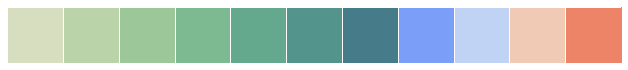

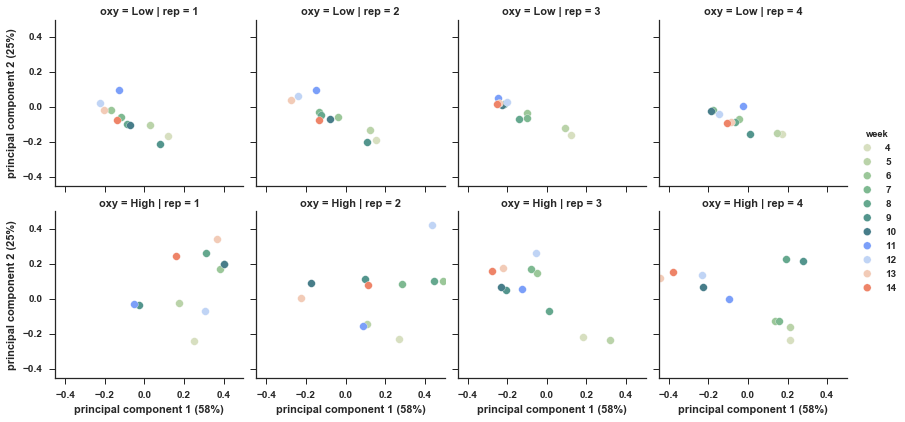

In [29]:
plot_pca_results(main_dir=MAIN_DIR)

In [30]:
from elviz_pca import build_color_palette

preparing colors for 7 pre-oxygen-switch samples and 4 post-switch samples
[[0.8423298817793848, 0.8737404427964184, 0.7524954030731037], [0.7294791289837665, 0.828271237142885, 0.6624387159929747], [0.6081786671884791, 0.7816177694090097, 0.6017787295654944], [0.4926406966923403, 0.7267784825949665, 0.5693088339489007], [0.39493837953687966, 0.6591653753197486, 0.5567106633592679], [0.3256286372570367, 0.5824294714811111, 0.551260440725878], [0.2775060539006816, 0.4896743690748741, 0.5382978119096076]]
11



[[0.8423298817793848, 0.8737404427964184, 0.7524954030731037],
 [0.7294791289837665, 0.828271237142885, 0.6624387159929747],
 [0.6081786671884791, 0.7816177694090097, 0.6017787295654944],
 [0.4926406966923403, 0.7267784825949665, 0.5693088339489007],
 [0.39493837953687966, 0.6591653753197486, 0.5567106633592679],
 [0.3256286372570367, 0.5824294714811111, 0.551260440725878],
 [0.2775060539006816, 0.4896743690748741, 0.5382978119096076],
 (0.48385432959999997, 0.62204984959999998, 0.97480820260000001),
 (0.75361061799999995, 0.83023285099999999, 0.96087115700000003),
 (0.94734540359999997, 0.79469550479999995, 0.71699050580000001),
 (0.93183129659999997, 0.51908552320000001, 0.40647960859999999)]

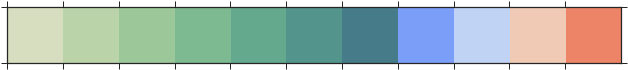

In [31]:
build_color_palette(num_items=14-4+1, weeks_before_switch=7)

loading ..//results/reduced_data--all_taxonomy_remains.csv
number of rows to keep: 223
(223, 89)
principal components' contribution to variance:
[ 0.25107297  0.11279974  0.02895022  0.01037814  0.00521771  0.00357079
  0.00308673  0.00267789  0.00149589] 
 (first 10)
preparing colors for 7 pre-oxygen-switch samples and 4 post-switch samples
[[0.8423298817793848, 0.8737404427964184, 0.7524954030731037], [0.7294791289837665, 0.828271237142885, 0.6624387159929747], [0.6081786671884791, 0.7816177694090097, 0.6017787295654944], [0.4926406966923403, 0.7267784825949665, 0.5693088339489007], [0.39493837953687966, 0.6591653753197486, 0.5567106633592679], [0.3256286372570367, 0.5824294714811111, 0.551260440725878], [0.2775060539006816, 0.4896743690748741, 0.5382978119096076]]
11

{'col': 'rep', 'ylim': (-0.45, 0.5), 'row': 'oxy', 'xlim': (-0.45, 0.5)}


../elviz_pca.py:86: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  data.sort(columns='variance', ascending=False, inplace=True)


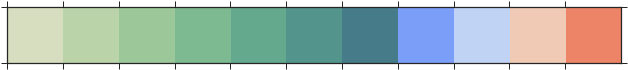

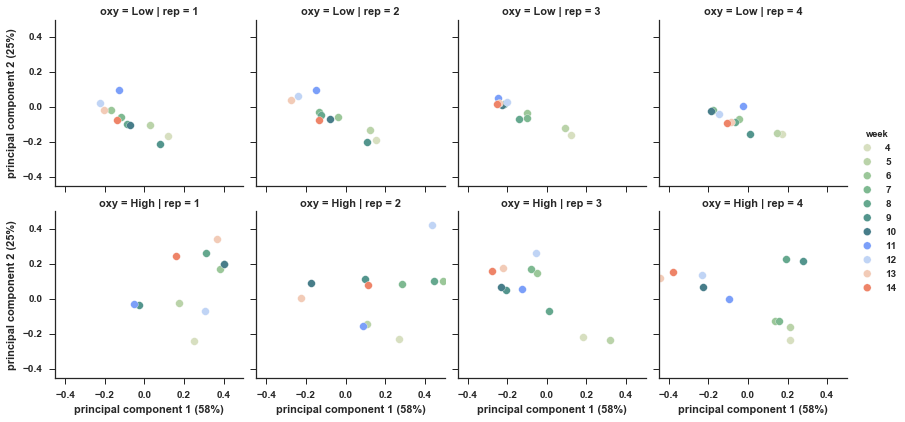

In [32]:
plot_pca_results(main_dir=MAIN_DIR, top_percent=20, genus_only=False)

In [33]:
from elviz_utils import read_sample_info

In [34]:
read_sample_info(main_dir=MAIN_DIR).head()

,ID,oxy,rep,week,project
0,1_LOW4,Low,1,4,1056013
1,13_LOW5,Low,1,5,1056037
2,25_LOW6,Low,1,6,1056061
3,37_LOW7,Low,1,7,1056085
4,49_LOW8,Low,1,8,1056109


In [35]:
type(read_sample_info(main_dir=MAIN_DIR).rep[0])

numpy.int64

In [36]:
import seaborn as sns

loading ..//results/reduced_data--all_taxonomy_remains.csv
number of rows to keep: 223
(223, 89)
principal components' contribution to variance:
[ 0.25107297  0.11279974  0.02895022  0.01037814  0.00521771  0.00357079
  0.00308673  0.00267789  0.00149589] 
 (first 10)
preparing colors for 7 pre-oxygen-switch samples and 4 post-switch samples
[[0.8423298817793848, 0.8737404427964184, 0.7524954030731037], [0.7294791289837665, 0.828271237142885, 0.6624387159929747], [0.6081786671884791, 0.7816177694090097, 0.6017787295654944], [0.4926406966923403, 0.7267784825949665, 0.5693088339489007], [0.39493837953687966, 0.6591653753197486, 0.5567106633592679], [0.3256286372570367, 0.5824294714811111, 0.551260440725878], [0.2775060539006816, 0.4896743690748741, 0.5382978119096076]]
11

{'ylim': (-0.45, 0.5), 'xlim': (-0.45, 0.5)}


../elviz_pca.py:86: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  data.sort(columns='variance', ascending=False, inplace=True)


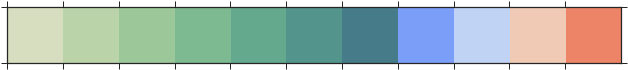

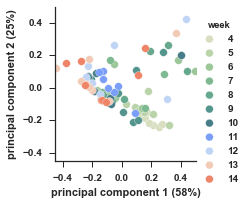

In [37]:
plot_pca_results(main_dir=MAIN_DIR, top_percent=20, genus_only=False, facet_row=False)